In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report

In [11]:
df = pd.read_csv("final_version-2.csv")

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [14]:
df

,code_dep,lib_commune,Inscrits,Votants,Nom,% Voix/Exp,year,code_commune_INSEE,code_postal,latitude,longitude,victimes_par_hab,infractions_par_hab,mosquee_par_hab,NB_Pers_par_Foyer_Alloc_par_hab,statut_commune_uu2020,revenu_imposable_par_habitant,rural,montagne,touristique,ptot_n,dep_inv_hor_remb_par_hab,dot_glo_fonc_par_hab,conso_ind_par_hab,cons_agr_par_hab,conso_ter_par_hab,conso_res_par_hab
0,1,Ambérieu-en-Bugey,8586,6624,droite_e,25.84,2017,1004,1500,45.960848,5.372926,0.009026,0.013022,0.000069,0.547747,unité urbaine,15279.369161,Non,Non,Non,14514.0,140.602246,120.377153,0.000000,0.000000,1.688783,3.914427
1,1,Ambronay,1880,1612,droite_e,29.59,2017,1007,1500,46.005591,5.357607,0.000000,0.008576,0.000343,0.468268,hors unité urbaine,14498.731389,Oui,Non,Non,2915.0,312.544082,91.378045,0.000000,0.000000,0.370497,1.534820
2,1,Ars-sur-Formans,945,818,droite_e,23.49,2017,1021,1480,45.993461,4.821996,0.000000,0.000000,0.000000,0.446465,hors unité urbaine,16525.082828,Oui,Non,Non,1485.0,283.456566,115.109091,0.000000,0.000000,0.670707,3.445791
3,1,Balan,1215,1014,droite_e,30.54,2017,1027,1360,45.831123,5.107800,0.000000,0.007648,0.000000,0.365966,unité urbaine,11913.421033,Non,Non,Non,2615.0,357.378585,77.704398,0.824857,0.000000,1.517782,1.328872
4,1,Bellignat,2072,1472,droite_e,23.80,2017,1031,1100,46.237350,5.636005,0.007720,0.012609,0.000000,0.501801,unité urbaine,12391.034997,Non,Oui,Non,3886.0,182.503860,51.073083,1.680906,0.000000,1.048379,3.107823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84865,95,Villeron,796,662,centre,19.07,2022,95675,95380,49.060843,2.534511,0.000000,0.003947,0.000000,0.000000,hors unité urbaine,16743.421053,Oui,Non,Non,1520.0,463.389474,10.077632,0.477632,0.631579,1.319079,2.250658
84866,95,Villiers-Adam,603,531,centre,29.79,2022,95678,95840,49.070289,2.239509,0.000000,0.019495,0.000000,0.000000,unité urbaine,23246.483945,Non,Non,Non,872.0,592.417431,112.481651,0.000000,0.000000,0.327982,4.932339
84867,95,Villiers-Adam,603,531,centre,29.79,2022,95678,95840,49.070289,2.239509,0.000000,0.019495,0.000000,0.000000,unité urbaine,23246.483945,Non,Non,Non,872.0,592.417431,112.481651,0.000000,0.000000,0.317661,3.310780
84868,95,Villiers-le-Bel,12401,8388,centre,18.34,2022,95680,95400,49.008449,2.403856,0.016328,0.011458,0.000105,0.000000,unité urbaine,9389.204660,Non,Non,Non,28540.0,426.957218,649.497968,2.229257,0.000000,0.000000,0.000000


In [15]:
df_filtré = df.drop(columns=['lib_commune', 'code_commune_INSEE', "latitude","longitude"])

In [16]:
data_encoded = pd.get_dummies(df_filtré)

In [17]:
X = data_encoded.drop(columns=['% Voix/Exp'])
y = data_encoded['% Voix/Exp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 53.83930713775273
R-squared: 0.5499134533645387


<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
RFR

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 23.225694278652565
R-squared: 0.8058375360525477


<br><br><br><br>
Essai grid_search

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

In [21]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

In [22]:
grid_search.fit(X_train, y_train)

/Users/teodesquatrevaux/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/teodesquatrevaux/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/teodesquatrevaux/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/teodesquatrevaux/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'nu

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [23]:
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres:", best_params)

Meilleurs hyperparamètres: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 150}


In [24]:
rf_model_tuned = RandomForestRegressor(random_state=42, **best_params)
rf_model_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=150, random_state=42)

In [25]:
y_pred_tuned = rf_model_tuned.predict(X_test)

In [26]:
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("Mean Squared Error (modèle optimisé):", mse_tuned)
print("R-squared (modèle optimisé):", r2_tuned)

Mean Squared Error (modèle optimisé): 21.162863278512955
R-squared (modèle optimisé): 0.8230824177292357


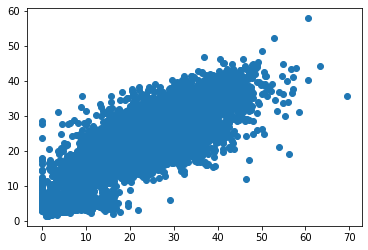

In [27]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_tuned)
plt.show()